Marcelo recebeu 250000
 reais de herança e deseja ficar um período sem trabalhar. Ele, por levar uma vida minimalista e já possuir um imóvel, tem gastos mensais que podem ser bem modelados por uma distribuição normal com média 3000
 e desvio padrão 1000
. Considere também que ele tem acesso a um investimento que rende líquido 1
% ao mês.

(a) Por quantos meses em média ele consegue viver sem trabalhar?

(b) Plot a distribuição do número de meses que ele pode ficar sem trabalhar.

Ele vai ficar em média 176.802 meses sem trabalhar


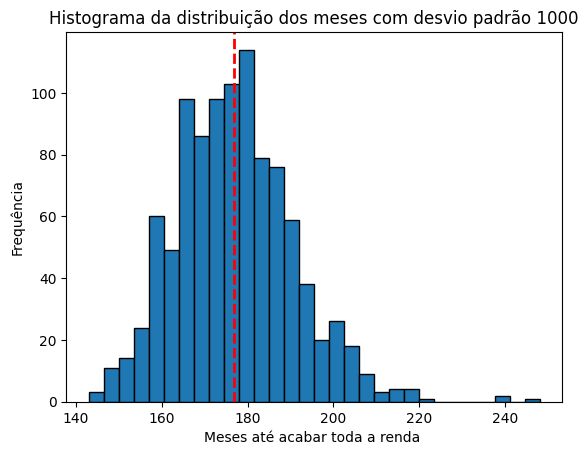

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import random

semente = 123  # Defina a semente desejada
random.seed(semente)

def monte_carlo(desvio_padrao):
    lista = []
    for i in range(1000):
    # Renda Marcelo
        y = 250000
    # Número de meses
        num_meses = 0
        while (y > 0 and num_meses < 1200):
            x = np.random.normal(3000, desvio_padrao)
            y = (y - x) * 1.01
            num_meses += 1
        lista.append(num_meses) 
    return lista   

if __name__ == "__main__":
    lista_2 = np.array(monte_carlo(desvio_padrao = 1000))
    print(f"Ele vai ficar em média {np.mean(lista_2)} meses sem trabalhar")
     # Plota o histograma dos coeficientes beta
    plt.hist(lista_2, bins = 30, edgecolor = 'black')
    plt.axvline(np.mean(lista_2), color='r', linestyle = '--', linewidth = 2)
    plt.xlabel('Meses até acabar toda a renda ')
    plt.ylabel('Frequência')
    plt.title('Histograma da distribuição dos meses com desvio padrão 1000')
    plt.show()


(c) Considere agora que o desvio padrão da sua distribuição de gastos aumenta para 3000. Como isso afeta os resultados?

Sugira uma métrica mais robusta que a média para informar o número de meses que ele pode ficar sem trabalhar.

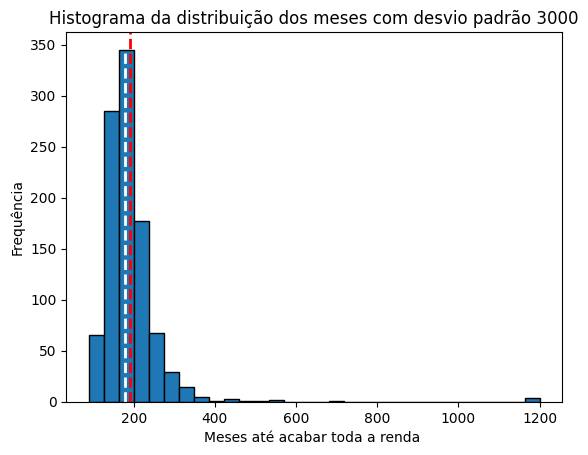

In [121]:
if __name__ == "__main__":
    lista_3 = np.array(monte_carlo(desvio_padrao = 3000))
    # Plota o histograma dos coeficientes beta
    plt.hist(lista_3, bins = 30, edgecolor = 'black')
    plt.axvline(np.mean(lista_3), color='r', linestyle = '--', linewidth = 2)
    plt.axvline(np.median(lista_3), color='w', linestyle = '--', linewidth = 2)
    plt.xlabel('Meses até acabar toda a renda ')
    plt.ylabel('Frequência')
    plt.title('Histograma da distribuição dos meses com desvio padrão 3000')
    plt.show()


# Sobre eficiência.

Existe uma forma que em geral é mais eficiente de gerar números aleatórios, que é tentar gerar a lista de uma só vez, em vez de gerar um número por vez dentro do loop. Poderia ser feito da seguinte forma:

In [122]:
def monte_carlo3(desvio_padrao):
    lista = []
    draws = list(np.random.normal(3000, desvio_padrao, size = 1200 * 1000))
    for i in range(1000):
    # Renda Marcelo
        y = 250000
    # Número de meses
        num_meses = 0
        while (y > 0 and num_meses < 1200):
            x = draws.pop()
            y = (y - x) * 1.01
            num_meses += 1
        lista.append(num_meses) 
    return lista  

Aqui eu gero todos os números que eu vou precisar primeiro em draws. Usando a primeira função, o tempo é:

In [123]:
%%timeit
lista_2 = np.array(monte_carlo(desvio_padrao = 1000))

122 ms ± 3.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Usando essa outra:

In [124]:
%%timeit
lista_2 = np.array(monte_carlo3(desvio_padrao = 1000))


91.7 ms ± 1.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
